In [1]:
import pandas as pd
import numpy as np
from bdint.models import CatBoost, RandomForest, LinearRegression

from bdint.data import (
    get_test_df,
    get_train_df)

In [2]:
train_df = get_train_df()
test_df = get_test_df()

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

MISSING COLUMNS: ['SalePrice']
MISSING COLUMNS: ['SalePrice']


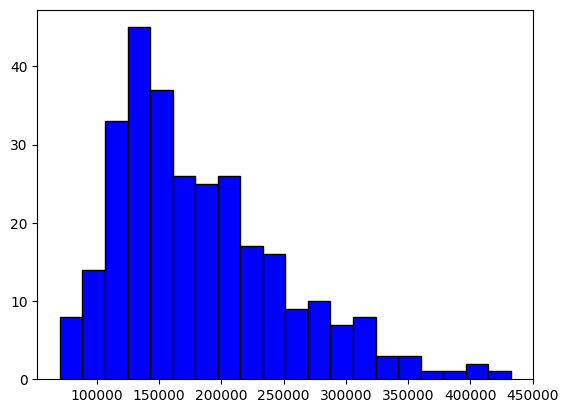

In [4]:


#KERNEL RIDGE REGRESSION
model = LinearRegression(train=train_df, test=test_df, regression_type="KernelRidge", skewness_threshold=1.0)
train, test = model._preprocess(train_df=train_df, test_df=test_df)

target = train[["SalePrice"]]
features = train.drop(columns=["SalePrice"])
target.columns = ["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state= 187)


model.learn(X_train, y_train)

prediction_ridge = model.predict(X_test)

plt.hist(prediction_ridge, bins=20, color="blue", edgecolor="black")
plt.show()

MISSING COLUMNS: ['SalePrice']
MISSING COLUMNS: ['SalePrice']


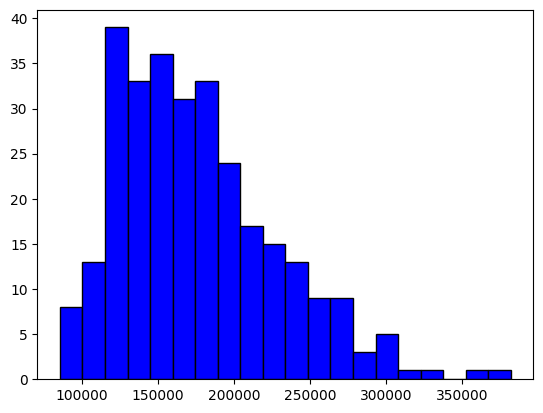

In [5]:
train_df = get_train_df()
test_df = get_test_df()

#LASSO REGRESSION
model = LinearRegression(train=train_df, test=test_df, regression_type="Lasso", skewness_threshold=1.0)
train, test = model._preprocess(train_df=train_df, test_df=test_df)

target = train[["SalePrice"]]
features = train.drop(columns=["SalePrice"])
target.columns = ["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state= 187)


model.learn(X_train, y_train)

prediction_lasso = model.predict(X_test)

plt.hist(prediction_lasso, bins=20, color="blue", edgecolor="black")
plt.show()

Learning rate set to 0.04196
0:	learn: 78317.7943078	total: 107ms	remaining: 1m 46s
250:	learn: 16943.8442494	total: 5.76s	remaining: 17.2s
500:	learn: 12148.9725695	total: 10.8s	remaining: 10.7s
750:	learn: 10117.3524383	total: 15.8s	remaining: 5.25s
999:	learn: 8540.5924842	total: 20.7s	remaining: 0us


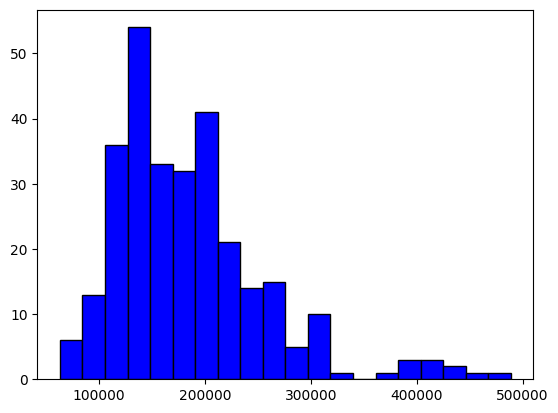

In [6]:
# CAT BOOST
train_df = get_train_df()
test_df = get_test_df()

model = CatBoost()

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=["SalePrice"], inplace=False), pd.DataFrame(train_df["SalePrice"]), test_size=0.2, random_state= 187)

# train model
model.learn(x_train_df=X_train, y_train_df=y_train)

# predict test set
prediction_cb = model.predict(x_test_df=X_test)

plt.hist(prediction_cb, bins=20, color="blue", edgecolor="black")
plt.show()

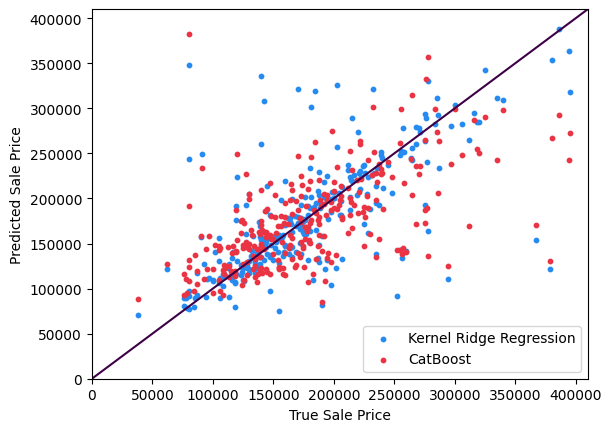

In [9]:

x_values = np.linspace(0, 450000, 100)  # Adjust the range as needed

y_values = x_values

# Plot the function f(x) = x


# Plot the scatter plot of the predicted array
plt.scatter(y_test["SalePrice"], prediction_ridge, color='#268bf0', label='Kernel Ridge Regression', s = 10)

plt.scatter(y_test["SalePrice"], prediction_cb, color='#eb3443', label='CatBoost', s = 10)
plt.plot(x_values, y_values, color="#3e0147")
# Add labels and legend
plt.xlabel('True Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()

plt.xlim(0, 410000)
plt.ylim(0, 410000)

# Show the plot
plt.savefig("vizualization/predictions_on_line_ridge_And_cat_boost.png")
plt.show()

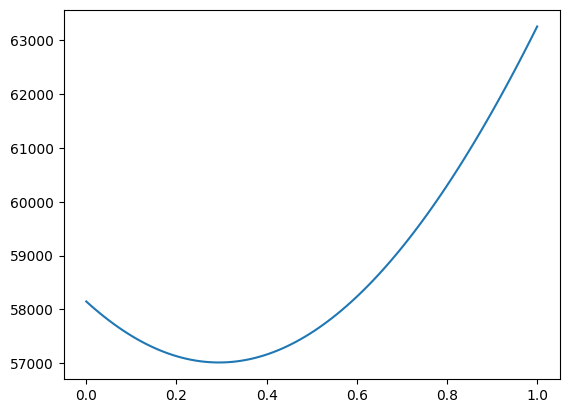

In [10]:
from sklearn.metrics import mean_squared_error

x_values = np.linspace(0, 1, 100)
y_values = []
for x in x_values:
    p = []
    for i in range(0, len(prediction_lasso)): 
        p.append(x * prediction_lasso[i] + (1-x) * prediction_ridge[i])
    
    mse = mean_squared_error(y_test["SalePrice"].values, p)
    rmse = np.sqrt(mse)
    y_values.append(rmse)

#plt.xlim(0.9,1)
#plt.ylim(22000,22600)
plt.plot(x_values, y_values)
plt.show()